<a href="https://www.kaggle.com/code/iamzaidalam/customer-churn-prediction-using-ann-keras-and-te?scriptVersionId=273889994" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True, dtype=int)


In [10]:
X = df.drop(columns=['Exited'])
y = df.Exited

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [13]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9953,550,47,2,0.00,2,1,1,97057.28,0,0,1
3850,680,34,3,143292.95,1,1,0,66526.01,0,0,1
4962,531,42,2,0.00,2,0,1,90537.47,0,0,0
3886,710,34,8,147833.30,2,0,1,1561.58,1,0,1
5437,543,30,6,73481.05,1,1,1,176692.65,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3919,763,39,7,0.00,2,1,0,19458.75,0,1,0
162,800,49,7,108007.36,1,0,0,47125.11,0,0,0
7903,567,34,10,0.00,2,0,1,161571.79,0,1,1
2242,621,30,2,101014.08,2,1,1,165257.31,1,0,0


In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


2025-11-06 05:49:32.530741: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762408172.775363      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762408172.848567      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [15]:
model = Sequential()

model.add(Dense(3,activation='sigmoid',input_dim = 11))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-06 05:49:46.458590: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='binary_crossentropy', optimizer = 'Adam')

In [18]:
model.fit(X_train_scaled,y_train, epochs=20)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.7537
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5746
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5076
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4702
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4584
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4493
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4386
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4357
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4388
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4336
Epoch 11/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4302
Epoch 12/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4267
Epoch 13/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4304
Epoch 14/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4329
Epoch 15/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

In [19]:
model.layers[0].get_weights()

[array([[ 1.48962528e-01,  1.66573912e-01,  1.75736621e-02],
        [-6.78870857e-01,  1.11314666e+00,  2.25566649e+00],
        [ 3.62973735e-02, -2.15204492e-01, -8.99777049e-04],
        [ 3.82931903e-02, -1.02043584e-01,  4.96197551e-01],
        [ 7.17277884e-01,  1.90736428e-01,  4.30780441e-01],
        [-4.26822454e-02, -2.35794663e-01, -4.95860130e-02],
        [ 8.71263623e-01, -7.31742501e-01, -2.03704089e-01],
        [-1.95085570e-01, -1.36305869e-01, -2.42397770e-01],
        [-5.70813060e-01,  9.02215064e-01,  8.06177333e-02],
        [-5.54927113e-03,  1.95614696e-01,  3.97064909e-02],
        [ 3.44427794e-01, -3.23091954e-01, -3.51415008e-01]], dtype=float32),
 array([ 1.0925217 , -0.6175657 , -0.58867294], dtype=float32)]

In [20]:
model.layers[1].get_weights()

[array([[-2.2584734],
        [ 0.4969735],
        [ 1.2661663]], dtype=float32),
 array([-0.7539471], dtype=float32)]

In [21]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [22]:
y_hat = np.where(y_log>0.5,1,0)


In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_hat)

0.82

In [24]:
clf = Sequential()

clf.add(Dense(11,activation='relu',input_dim = 11))
clf.add(Dense(11, activation='relu'))
clf.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
clf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
clf.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [27]:
clf.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6554 - loss: 0.6174 - val_accuracy: 0.7975 - val_loss: 0.4753
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8030 - loss: 0.4601 - val_accuracy: 0.8050 - val_loss: 0.4327
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8216 - loss: 0.4289 - val_accuracy: 0.8119 - val_loss: 0.4150
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8302 - loss: 0.4126 - val_accuracy: 0.8250 - val_loss: 0.4011
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8341 - loss: 0.4024 - val_accuracy: 0.8306 - val_loss: 0.3890
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8412 - loss: 0.3897 - val_accuracy: 0.8356 - val_loss: 0.3765
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8517 - loss: 0.3797 - val_accuracy: 0.8475 - val_loss: 0.3667
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8494 - loss: 0.3755 - val_accu

In [28]:
clf.layers[0].get_weights()

[array([[ 0.289203  , -0.42810902,  0.164655  , -0.19400434, -0.14815351,
         -0.05840286, -0.01276978, -0.21379939, -0.03525979, -0.3453302 ,
         -0.10176313],
        [ 0.3108943 , -0.7050697 ,  0.36436072,  0.19249494,  0.7693609 ,
         -0.31973326, -0.74472743, -0.08149587, -0.74392986,  0.66508144,
         -0.06785219],
        [-0.04173554,  0.4283846 , -0.09117061,  0.10473297,  0.44668385,
         -0.22728196, -0.22200288,  0.16910863,  0.20347148, -0.06558341,
         -0.3403586 ],
        [-0.3935055 ,  0.27946347,  0.16965255, -0.24002442, -0.27765492,
         -0.464521  , -0.01278315,  0.46621954, -0.60422647, -0.12512147,
          0.22217366],
        [ 0.08046161,  0.0158342 ,  0.38583308, -1.240125  ,  0.4266544 ,
         -1.1624608 ,  0.05148046,  0.42496124,  0.11060272, -0.22584108,
          1.1281297 ],
        [ 0.16972512, -0.08041954, -0.16937105, -0.03770727,  0.6715104 ,
          0.47210053, -0.0472578 , -0.14107095,  0.82218474,  0.1459297

In [29]:
clf.layers[1].get_weights()

[array([[-0.8889415 , -0.1497873 ,  0.05139111,  0.3044066 ,  0.11725082,
          0.33275995, -0.09448013,  0.10510201,  0.42461687,  0.17035352,
          0.0520973 ],
        [ 0.43712828,  0.1805734 , -0.37286356, -0.60657   , -0.52949387,
          0.26983678, -0.14364564, -0.02754755, -0.02572335,  0.34396273,
          0.42204803],
        [ 0.5284696 , -0.30410013,  0.13938351,  0.00974446,  0.2533304 ,
         -0.09270198,  0.21229051,  0.58090776,  0.31481758,  0.08780913,
         -0.01904984],
        [-0.04789035, -0.14541063, -0.18137877, -0.20255914,  0.61983645,
         -0.14405784,  0.26759622,  0.71121716, -0.9048368 , -0.31642815,
         -0.0120348 ],
        [ 0.6144355 , -0.2111436 ,  0.60262126,  0.0335606 , -0.35390353,
         -0.02100407, -0.6845584 ,  0.14078437,  0.22942257,  0.41625232,
          0.10437933],
        [-0.13009329,  0.27253562,  0.40916252, -0.38243672,  0.02999366,
          0.21272378,  0.4477376 ,  0.40386644, -0.60857266, -0.0507397

In [30]:
clf.layers[2].get_weights()

[array([[ 0.6916826 ],
        [-1.005329  ],
        [ 1.5253603 ],
        [-0.6989184 ],
        [ 1.523795  ],
        [-0.25111297],
        [ 1.3483307 ],
        [ 0.683689  ],
        [-0.36270696],
        [-0.7730825 ],
        [-0.8539059 ]], dtype=float32),
 array([-0.17246117], dtype=float32)]

In [31]:
y_log = clf.predict(X_test_scaled)
y_hat = np.where(y_log>0.5,1,0)
accuracy_score(y_test, y_hat)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


0.863

In [32]:
history = clf.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8742 - loss: 0.3101 - val_accuracy: 0.8556 - val_loss: 0.3503
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8655 - loss: 0.3279 - val_accuracy: 0.8581 - val_loss: 0.3500
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8744 - loss: 0.3144 - val_accuracy: 0.8562 - val_loss: 0.3508
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8728 - loss: 0.3148 - val_accuracy: 0.8587 - val_loss: 0.3497
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8654 - loss: 0.3267 - val_accuracy: 0.8562 - val_loss: 0.3491
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8623 - loss: 0.3256 - val_accuracy: 0.8556 - val_loss: 0.3478
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8595 - loss: 0.3358 - val_accuracy: 0.8562 - val_loss: 0.3506
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8690 - loss: 0.3179 - val_accu

In [33]:
import matplotlib.pyplot as plt

In [34]:
history.history

{'accuracy': [0.8676562309265137,
  0.8698437213897705,
  0.867968738079071,
  0.8690624833106995,
  0.8671875,
  0.8687499761581421,
  0.8695312738418579,
  0.8671875,
  0.8693749904632568,
  0.8685937523841858,
  0.8687499761581421,
  0.8700000047683716,
  0.8692187666893005,
  0.8695312738418579,
  0.8709375262260437,
  0.8676562309265137,
  0.8692187666893005,
  0.8696874976158142,
  0.8700000047683716,
  0.8687499761581421,
  0.8692187666893005,
  0.8681250214576721,
  0.8689062595367432,
  0.8695312738418579,
  0.8687499761581421,
  0.8695312738418579,
  0.8675000071525574,
  0.8693749904632568,
  0.8687499761581421,
  0.8692187666893005,
  0.8696874976158142,
  0.8682812452316284,
  0.8678125143051147,
  0.8681250214576721,
  0.8681250214576721,
  0.8684375286102295,
  0.8698437213897705,
  0.8695312738418579,
  0.8689062595367432,
  0.8684375286102295,
  0.8704687356948853,
  0.8684375286102295,
  0.8706250190734863,
  0.867968738079071,
  0.8706250190734863,
  0.87015622854232

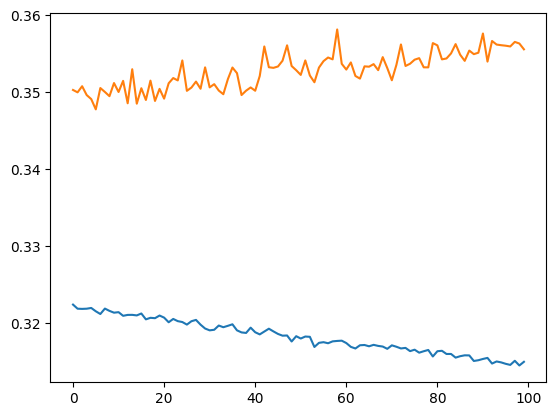

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

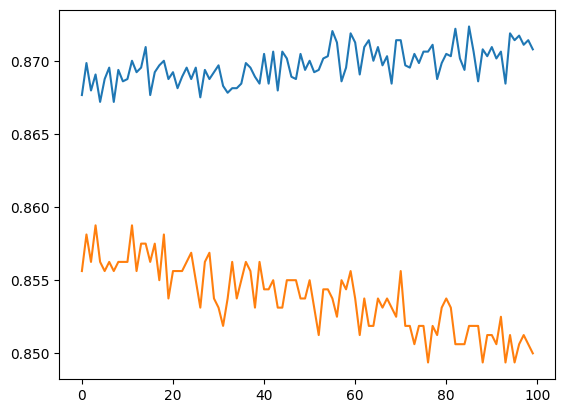

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])